In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import mplleaflet
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv('USweatherdata.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [5]:
df['Data_Value'] = df['Data_Value'] * 0.1 #outof coursera platform memrory
df['Year'] = df['Date'].apply(lambda x: x[:4])
df['Date2'] = df['Date'].apply(lambda x: x[-5:])
df = df[df['Date2'] != '02-29']
df_05_14 = df[~(df['Year'] == '2015')]
df_15 = df[df['Year'] == '2015']
df_05_14.head()

,ID,Date,Element,Data_Value,Year,Date2
0,USW00094889,2014-11-12,TMAX,2.2,2014,11-12
1,USC00208972,2009-04-29,TMIN,5.6,2009,04-29
2,USC00200032,2008-05-26,TMAX,27.8,2008,05-26
3,USC00205563,2005-11-11,TMAX,13.9,2005,11-11
4,USC00200230,2014-02-27,TMAX,-10.6,2014,02-27


In [6]:
max_0415 = df_05_14.groupby('Date2').agg({'Data_Value':np.max})
min_0415 = df_05_14.groupby('Date2').agg({'Data_Value':np.min})
max_15 = df_15.groupby('Date2').agg({'Data_Value':np.max})
min_15 = df_15.groupby('Date2').agg({'Data_Value':np.min})
all_max = pd.merge(max_0415.reset_index(), max_15.reset_index(), left_index=True, on = 'Date2')
all_min = pd.merge(min_0415.reset_index(), min_15.reset_index(), left_index=True, on = 'Date2')

In [7]:
break_max = all_max[all_max['Data_Value_y'] > all_max['Data_Value_x']]
break_min = all_min[all_min['Data_Value_y'] < all_min['Data_Value_x']]
break_max.head()

,Date2,Data_Value_x,Data_Value_y
39,02-09,7.8,8.3
106,04-17,24.4,27.8
126,05-07,25.6,30.6
127,05-08,31.7,33.3
130,05-11,29.4,30.6


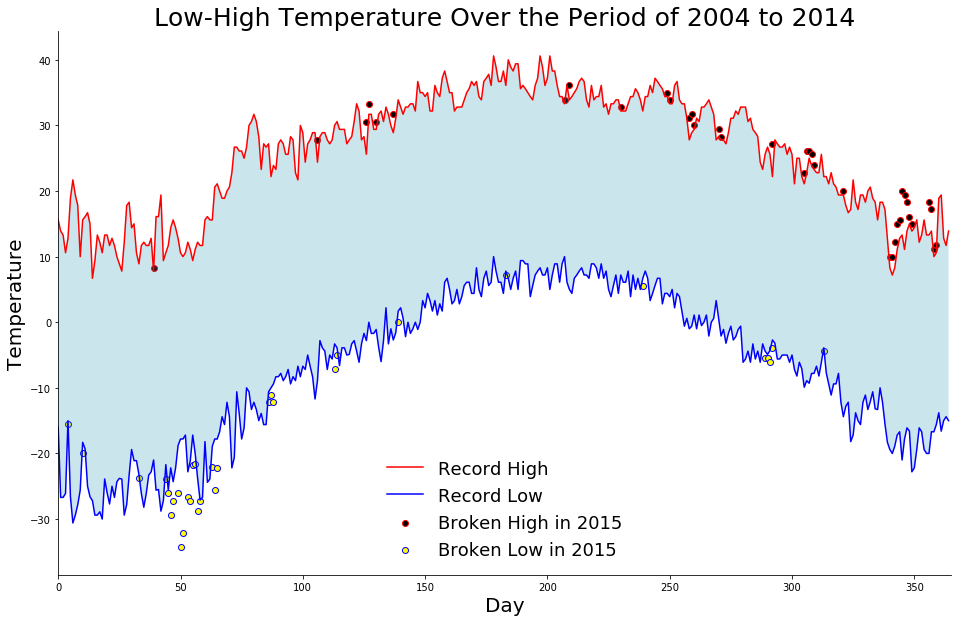

In [12]:
plt.figure(figsize=(16,10))

plt.plot(max_0415.values, c = 'red', label ='Record High')
plt.plot(min_0415.values, c = 'blue', label ='Record Low')

plt.xlabel('Day', fontsize=20)
plt.ylabel('Temperature', fontsize=20)
plt.title('Low-High Temperature Over the Period of 2004 to 2014', fontsize=25)

plt.scatter(break_max.index.tolist(), break_max['Data_Value_y'].values, c = 'black', edgecolors='r', label = "Broken High in 2015")
plt.scatter(break_min.index.tolist(), break_min['Data_Value_y'].values, c = 'yellow', edgecolors='b',label = "Broken Low in 2015")

plt.gca().fill_between(range(len(max_0415)), 
                       np.array(max_0415.values.reshape(len(min_0415.values),)), 
                       np.array(min_0415.values.reshape(len(min_0415.values),)), 
                       facecolor='#2F99B4', 
                       alpha=0.25)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc = 8, fontsize=18, frameon = False)
plt.xlim(0,365)
plt.show()
